In [1]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 26.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 27.8 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [18]:
df = pd.read_json("medicamentos.json")
df.head()

,totalRegistros,medicamentos
0,8607,"{'apresentacoes': [{'codigo': 1187394, 'aprese..."
1,8607,"{'apresentacoes': [{'codigo': 429678767, 'apre..."
2,8607,"{'apresentacoes': [{'codigo': 423997818, 'apre..."
3,8607,"{'apresentacoes': [{'codigo': 551039, 'apresen..."
4,8607,"{'apresentacoes': [{'codigo': 150387, 'apresen..."


In [19]:
df_meds = pd.json_normalize(df['medicamentos'])
df_meds.head()

,apresentacoes,id,codigo,numeroRegistro,nomeProduto,numeroProcesso,empresaNome,empresaCnpj,principioAtivo,tarja,medicamentoReferencia,classesTerapeuticas,bula_txt,bula_pdf,categoriaRegulatoria,situacaoRegistro,dataProduto,dataVencimentoRegistro
0,"[{'codigo': 1187394, 'apresentacao': '(0,625 M...",1,765613,102351059,A SAÚDE DA MULHER,25351668917201032,EMS S/A,57507378000365,"TINTURA AGONIADA PLUMÉRIA, SALICILATO DE SÓDIO...",None,None,ANTIESPASMODICOS E ANTICOLINERGICOS-ASSOC MED...,\n\n \n \n \n \n \n \n \n \nA SAÚDE DA MULHER\...,storage/25351668917201032.pdf,Novo,Válido,2012-03-26T03:00:00.000Z,2029-07-01T03:00:00.000Z
1,"[{'codigo': 429678767, 'apresentacao': '100 MG...",2,3548748,178170936,AAS,25351497156202266,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,61082426000207,ACIDO ACETILSALICILICO,Sem Tarja,ASPIRINA – Bayer S.A.,ANALGESICOS NAO NARCOTICOS,\n\n \n \n \n \n \n \n \n \nAAS\n\n \nInfanti...,storage/25351497156202266.pdf,Similar,Válido,2022-08-30T03:00:00.000Z,2029-12-01T03:00:00.000Z
2,"[{'codigo': 423997818, 'apresentacao': '100 MG...",3,3529192,178170931,AAS PROTECT,25351497237202266,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,61082426000207,ÁCIDO ACETILSALICÍLICO,Vermelha,ASPIRINA PREVENT,ANTIAGREGANTE PLAQUETARIO,\n\n \n \n \n \n \n \n \n \n \n \n \n ...,storage/25351497237202266.pdf,Similar,Válido,2022-08-08T03:00:00.000Z,2026-11-01T03:00:00.000Z
3,"[{'codigo': 551039, 'apresentacao': '10 MG/G C...",4,428320,106890153,ABC,25351141033200572,KLEY HERTZ FARMACEUTICA S.A,92695691000103,CLOTRIMAZOL,Sem Tarja,CANESTEN,ANTIMICOTICOS PARA USO TOPICO,\n\n \n \n \n \n \n \n \n \n \n \n \nABC\n®\n ...,storage/25351141033200572.pdf,Similar,Válido,2005-10-24T03:00:00.000Z,2025-10-01T03:00:00.000Z
4,"[{'codigo': 150387, 'apresentacao': '(10 + 50 ...",5,70669,144930011,ABCLER ABNAT,253510001840168,AIRELA INDÚSTRIA FARMACÊUTICA LTDA.,01858973000129,"DL-METIONINA, RACEMETIONINA, BETAÍNA, CITRATO ...",None,None,OUTROS PRODUTOS PARA O APARELHO DIGESTIVO E ME...,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...,storage/253510001840168.pdf,Similar,Válido,2001-06-07T03:00:00.000Z,2026-06-01T03:00:00.000Z


In [ ]:
df_exploded = df['medicamentos'].apply(lambda x: x['apresentacoes']).explode()
df_exploded

0       {'codigo': 1187394, 'apresentacao': '(0,625 ML...
0       {'codigo': 1576825, 'apresentacao': '(0,625 ML...
1       {'codigo': 429678767, 'apresentacao': '100 MG ...
1       {'codigo': 429678768, 'apresentacao': '100 MG ...
1       {'codigo': 429678769, 'apresentacao': '100 MG ...
                              ...                        
8606    {'codigo': 280856324, 'apresentacao': '50 MG C...
8606    {'codigo': 280856325, 'apresentacao': '50 MG C...
8606    {'codigo': 280856326, 'apresentacao': '50 MG C...
8606    {'codigo': 280856327, 'apresentacao': '50 MG C...
8606    {'codigo': 280856328, 'apresentacao': '50 MG C...
Name: medicamentos, Length: 68986, dtype: object

In [15]:
df_final = pd.json_normalize(df_exploded)
df_final.head()

,codigo,apresentacao,formasFarmaceuticas,numero,tonalidade,dataPublicacao,validade,tipoValidade,registro,principiosAtivos,...,inativa,emAnalise,embalagemPrimaria.tipo,embalagemPrimaria.observacao,embalagemSecundaria.tipo,embalagemSecundaria.observacao,embalagemPrimaria,embalagemSecundaria,qtdUnidadeMedida,embalagemPrimariaTodas
0,1187394.0,"(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",[SOLUÇAO ORAL],1.0,NaN,2012-03-26T00:00:00.000-0300,24,2,1023510590017,"[TINTURA AGONIADA PLUMÉRIA, SALICILATO DE SÓDI...",...,False,False,FRASCO DE VIDRO AMBAR,None,CARTUCHO DE CARTOLINA,None,NaN,NaN,NaN,NaN
1,1576825.0,"(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",[SOLUÇAO ORAL],2.0,NaN,2012-03-26T00:00:00.000-0300,24,2,1023510590025,"[TINTURA AGONIADA PLUMÉRIA, SALICILATO DE SÓDI...",...,False,False,FRASCO DE VIDRO AMBAR,None,CARTUCHO DE CARTOLINA,None,NaN,NaN,NaN,NaN
2,429678767.0,100 MG COM CT BL AL PLAS TRANS X 30,[COMPRIMIDO SIMPLES],1.0,NaN,2022-08-30T00:00:00.000-0300,15,2,1781709360017,[ACIDO ACETILSALICILICO],...,False,False,BLISTER DE ALUMINIO/PLASTICO TRANSPARENTE,None,CARTUCHO DE CARTOLINA,None,NaN,NaN,NaN,NaN
3,429678768.0,100 MG COM CT FR PLAS OPC X 120,[COMPRIMIDO SIMPLES],2.0,NaN,2022-08-30T00:00:00.000-0300,18,2,1781709360025,[ACIDO ACETILSALICILICO],...,False,False,FRASCO DE PLASTICO OPACO,None,CARTUCHO DE CARTOLINA,None,NaN,NaN,NaN,NaN
4,429678769.0,100 MG COM CT BL AL PLAS TRANS X 200,[COMPRIMIDO SIMPLES],3.0,NaN,2022-08-30T00:00:00.000-0300,15,2,1781709360033,[ACIDO ACETILSALICILICO],...,False,False,BLISTER DE ALUMINIO/PLASTICO TRANSPARENTE,None,CARTUCHO DE CARTOLINA,None,NaN,NaN,NaN,NaN


In [32]:
print("Número de filas:", df_final.shape[0])
print("Número de columnas:", df_final.shape[1])
print(f"Tamaño en memoria: {df_final.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Columnas: {df_final.columns.tolist()}")
print(f"cantidad de columnas por tipo: \n {df_final.dtypes.value_counts()}")


Número de filas: 68986
Número de columnas: 41
Tamaño en memoria: 153.68 MB
Columnas: ['codigo', 'apresentacao', 'formasFarmaceuticas', 'numero', 'tonalidade', 'dataPublicacao', 'validade', 'tipoValidade', 'registro', 'principiosAtivos', 'complemento', 'embalagemSecundariaTodas', 'envoltorios', 'acessorios', 'acondicionamento', 'marcas', 'fabricantesNacionais', 'fabricantesInternacionais', 'viasAdministracao', 'ifaUnico', 'conservacao', 'restricaoPrescricao', 'restricaoUso', 'destinacao', 'restricaoHospitais', 'tarja', 'medicamentoReferencia', 'apresentacaoFracionada', 'dataVencimentoRegistro', 'tipoAutorizacao', 'ativa', 'inativa', 'emAnalise', 'embalagemPrimaria.tipo', 'embalagemPrimaria.observacao', 'embalagemSecundaria.tipo', 'embalagemSecundaria.observacao', 'embalagemPrimaria', 'embalagemSecundaria', 'qtdUnidadeMedida', 'embalagemPrimariaTodas']
cantidad de columnas por tipo: 
 object     34
float64     7
Name: count, dtype: int64


In [ ]:
print(f"Numero de nulos por columna: {df_final.isnull().sum()}")


Numero de nulos por columna: codigo                              678
apresentacao                        678
formasFarmaceuticas                 678
numero                              678
tonalidade                        68986
dataPublicacao                      678
validade                            774
tipoValidade                        754
registro                           2434
principiosAtivos                    678
complemento                       65823
embalagemSecundariaTodas            678
envoltorios                         678
acessorios                          678
acondicionamento                  68986
marcas                              678
fabricantesNacionais                678
fabricantesInternacionais           678
viasAdministracao                   678
ifaUnico                            678
conservacao                         678
restricaoPrescricao                 678
restricaoUso                        678
destinacao                          678
restricaoHo

In [38]:
print(f"% de nulos por columna: {(df_final.isnull().mean() * 100).round(2)}")


% de nulos por columna: codigo                              0.98
apresentacao                        0.98
formasFarmaceuticas                 0.98
numero                              0.98
tonalidade                        100.00
dataPublicacao                      0.98
validade                            1.12
tipoValidade                        1.09
registro                            3.53
principiosAtivos                    0.98
complemento                        95.42
embalagemSecundariaTodas            0.98
envoltorios                         0.98
acessorios                          0.98
acondicionamento                  100.00
marcas                              0.98
fabricantesNacionais                0.98
fabricantesInternacionais           0.98
viasAdministracao                   0.98
ifaUnico                            0.98
conservacao                         0.98
restricaoPrescricao                 0.98
restricaoUso                        0.98
destinacao                       

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


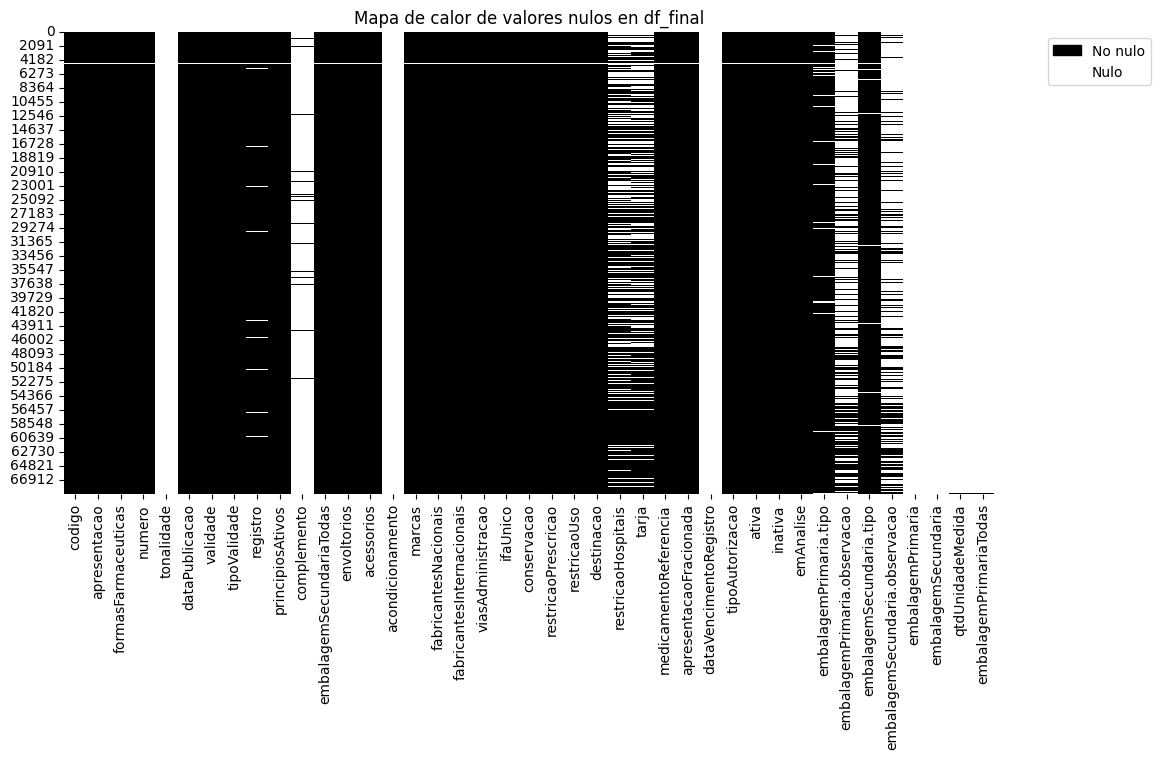

In [48]:
null_matrix = df_final.isnull()

# Usamos seaborn heatmap
plt.figure(figsize=(12,6)) 
sns.heatmap(null_matrix, 
            cmap=["black","white"], 
            cbar=False)
plt.title("Mapa de calor de valores nulos en df_final")
blue_patch = mpatches.Patch(color='black', label='No nulo')
white_patch = mpatches.Patch(color='white', label='Nulo')
plt.legend(handles=[blue_patch, white_patch], 
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()